In [119]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pyproj import Proj
import numpy as np
%matplotlib inline

In [120]:
#data from: https://www.kaggle.com/adamschroeder/crimes-new-york-city/data
crimeData=pd.read_csv(os.getcwd()+'/data/NYPD_Complaint_Data_Historic.csv')
crimeData = crimeData[np.isfinite(crimeData['Latitude'])]
crimeData = crimeData[np.isfinite(crimeData['Longitude'])]
#http://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page
#StopFrisk Variable Details: https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660#
stopfriskData=pd.read_csv(os.getcwd()+'/data/stop_frisk_2015.csv')

#http://johnkeefe.net/nypd-stop-frisk-data-for-you
#stopfriskData2011=pd.read_csv(os.getcwd()+'/data/stop_frisk_2015.csv')

#https://github.com/mattpiccolella/stop-and-frisk/blob/master/bin/convert_coordinates.py
#stopfriskData2012=pd.read_csv(os.getcwd()+'/data/2012.csv')

/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
def convert_coordinates(df):
    df = df.convert_objects(convert_numeric=True)
    df = df.astype('float')
    #convert feet to meters
    df = df.apply(lambda row: row*0.3048, axis=1)
    proj=Proj("+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")
    results = df.apply(lambda row: proj(row['xcoord'], row['ycoord'], inverse=True), axis=1)
    return results
#result2012=convert_coordinates(stopfriskData2012[['xcoord','ycoord']])
result2015=convert_coordinates(stopfriskData[['xcoord','ycoord']])

/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [122]:
sorted(list(stopfriskData.keys()))

['ac_assoc',
 'ac_cgdir',
 'ac_evasv',
 'ac_incid',
 'ac_inves',
 'ac_other',
 'ac_proxm',
 'ac_rept',
 'ac_stsnd',
 'ac_time',
 'addrnum',
 'addrpct',
 'addrtyp',
 'adtlrept',
 'age',
 'aptnum',
 'arstmade',
 'arstoffn',
 'asltweap',
 'beat',
 'build',
 'city',
 'comppct',
 'compyear',
 'contrabn',
 'crimsusp',
 'crossst',
 'cs_bulge',
 'cs_casng',
 'cs_cloth',
 'cs_descr',
 'cs_drgtr',
 'cs_furtv',
 'cs_lkout',
 'cs_objcs',
 'cs_other',
 'cs_vcrim',
 'datestop',
 'detailCM',
 'dettypCM',
 'dob',
 'explnstp',
 'eyecolor',
 'forceuse',
 'frisked',
 'haircolr',
 'ht_feet',
 'ht_inch',
 'inout',
 'knifcuti',
 'lineCM',
 'machgun',
 'officrid',
 'offshld',
 'offunif',
 'offverb',
 'othfeatr',
 'othpers',
 'othrweap',
 'pct',
 'perobs',
 'perstop',
 'pf_baton',
 'pf_drwep',
 'pf_grnd',
 'pf_hands',
 'pf_hcuff',
 'pf_other',
 'pf_pepsp',
 'pf_ptwep',
 'pf_wall',
 'pistol',
 'post',
 'premname',
 'premtype',
 'race',
 'radio',
 'recstat',
 'repcmd',
 'rescode',
 'revcmd',
 'rf_attir',
 'rf_b

In [123]:
stopfriskData.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,,61,E,7,,1000091,156314,CM,1,14
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,,22,E,14,,994617,227693,CM,1,20
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,,20,H,,16,991510,225019,CM,1,78
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78


In [124]:
#stopfriskData2012[['Longitude', 'Latitude']] = result2012.apply(pd.Series)
stopfriskData[['Longitude', 'Latitude']] = result2015.apply(pd.Series)
stopfriskData = stopfriskData[stopfriskData['Latitude'] <100] 
#zip is allblank, year is all 2015
stopfriskinclude=['Latitude','Longitude','race','age','sex','arstmade',
                 'sector','searched','sumoffen','sumissue','year','beat',
                 'city','pistol']
stopfriskDatareduced=stopfriskData[stopfriskinclude]

In [132]:
stopfriskDatareduced.shape

(21747, 14)

In [164]:
crimeData['Datetime']=pd.to_datetime(crimeData.CMPLNT_FR_DT,format='%m/%d/%Y',errors='coerce')
crimeData['Year']=pd.Series(crimeData['Datetime']).dt.year
crimeData['Month']=pd.Series(crimeData['Datetime']).dt.month
crimeData['Day']=pd.Series(crimeData['Datetime']).dt.day
crimeData=crimeData[crimeData['Year']==2015]

In [165]:
crimeData

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Datetime,Year,Month,Day
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",2015-12-31,2015.0,12.0,31.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",2015-12-31,2015.0,12.0,31.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",2015-12-31,2015.0,12.0,31.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",2015-12-31,2015.0,12.0,31.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",2015-12-31,2015.0,12.0,31.0
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)",2015-12-31,2015.0,12.0,31.0
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)",2015-12-31,2015.0,12.0,31.0
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)",2015-12-31,2015.0,12.0,31.0
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)",2015-12-31,2015.0,12.0,31.0
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)",2015-12-31,2015.0,12.0,31.0


In [166]:
stopfriskData.head(20)
totalarrests=len(stopfriskData[stopfriskData['arstmade']=='Y']['arstmade'])
totalstops=len(stopfriskData['arstmade'])
totalarrests/totalstops
print(str(totalarrests)+' out of '+str(totalstops)+' total stop+frisks resulted in an arrest ('+str(100*totalarrests/totalstops)+'%'+')')

3836 out of 21747 total stop+frisks resulted in an arrest (17.63921460431324%)


5
10
20
30
40


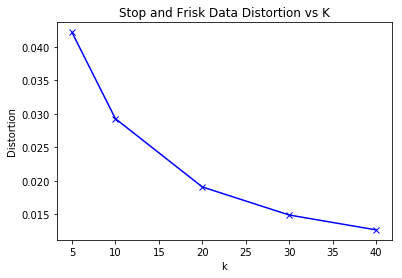

In [167]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
XStopFrisk=stopfriskData.loc[:,['Latitude','Longitude']]
distortionsStopFrisk = []
K = [5,10,20,30,40]
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k,init='k-means++').fit(XStopFrisk)
    distortionsStopFrisk.append(sum(np.min(cdist(XStopFrisk, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / XStopFrisk.shape[0])

# Plot the elbow
plt.plot(K, distortionsStopFrisk, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Stop and Frisk Data Distortion vs K')
plt.show()

5
10
20
30
40


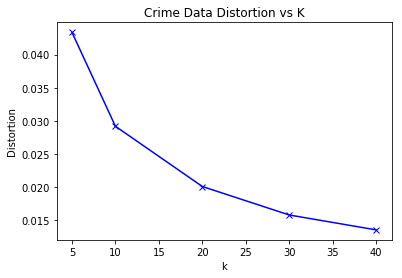

In [168]:
# k means determine k
XCrime=crimeData.loc[:,['Latitude','Longitude']]
distortionsCrime = []
K = [5,10,20,30,40]
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k,init='k-means++').fit(XCrime)
    distortionsCrime.append(sum(np.min(cdist(XCrime, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / XCrime.shape[0])

# Plot the elbow
plt.plot(K, distortionsCrime, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Crime Data Distortion vs K')
plt.show()

In [169]:
print(distortions)
print(distortionsStopFrisk)

[0.043288225931290641, 0.029074781822820372, 0.019794477195593976, 0.015832586703186435, 0.013715485941336297]
[0.042195104251254591, 0.029271425166724648, 0.019056521142907307, 0.014857516639948814, 0.012633951218535409]


In [170]:
from sklearn.cluster import KMeans
numclusters=20
KMmodelStopFrisk=KMeans(n_clusters=numclusters, n_init=10, max_iter=300, init='k-means++')
XStopFrisk=stopfriskData.loc[:,['Latitude','Longitude']]
stopfriskCluster=KMmodelStopFrisk.fit(XStopFrisk)

KMmodelCrime=KMeans(n_clusters=numclusters, n_init=10, max_iter=300, init='k-means++')
XCrime=crimeData.loc[:,['Latitude','Longitude']]
crimeCluster=KMmodelCrime.fit(XCrime)

In [171]:
from scipy import spatial
def findclosest(vec,space):
    tree=spatial.KDTree(space)
    return tree.query(vec)[1]


distanceStopFriskCrime=list()
for i in stopfriskCluster.cluster_centers_:
    closestCentroid=findclosest(i,crimeCluster.cluster_centers_)
    distanceStopFriskCrime.append(np.linalg.norm(i-crimeCluster.cluster_centers_[closestCentroid]))
distanceStopFriskCrime=distanceStopFriskCrime/max(distanceStopFriskCrime)

In [172]:
distanceDict=dict(zip(list(range(numclusters)),distanceStopFriskCrime))

In [173]:
import folium
folium_mapfriskcrimedist = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
#marker = folium.CircleMarker(location=[40.738, -73.98])
#marker.add_to(folium_map)
color="#0A8A9F" #teal
counter=0
for i in stopfriskCluster.cluster_centers_:
    folium.CircleMarker(location=(i[0],
                                  i[1]),
                        radius=10*distanceDict[counter],
                        color=color,
                        fill=True).add_to(folium_mapfriskcrimedist)
    counter+=1

color="#E37222" # tangerine
for i in crimeCluster.cluster_centers_:
    folium.CircleMarker(location=(i[0],
                                  i[1]),
                        radius=1,
                        color=color,
                        fill=True).add_to(folium_mapfriskcrimedist)

In [174]:
folium_mapfriskcrimedist

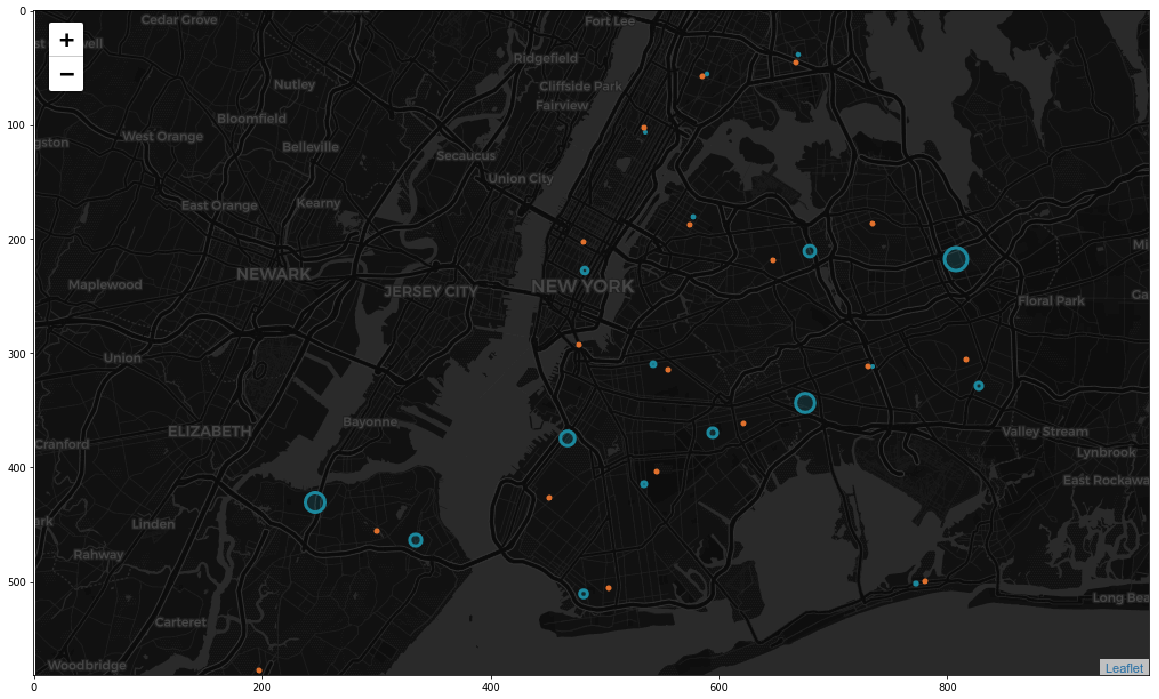

In [185]:
#Displaying the above leaflet as a saved image because github can't display leaflet
import matplotlib.image as mpimg
img=mpimg.imread(os.getcwd()+'/images/distmap.png')
plt.figure(figsize = (20,20))
plt.imshow(img)

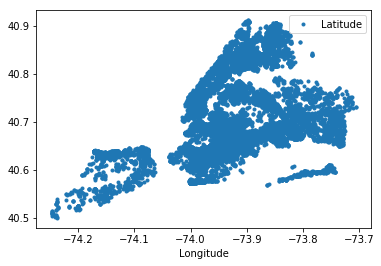

In [40]:
stopfriskData.plot(x='Longitude',y='Latitude',style='.')

In [33]:
dir(KMmodel)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_fit_data',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [30]:
X.shape

(21747, 2)

Let's take a quick looks at al of the latitude/longitude data from all crimes.  

In [23]:
stopfriskData[['Longitude','Latitude']]

,Longitude,Latitude
0,-7.394297e+01,4.059571e+01
1,-7.396257e+01,4.079163e+01
2,-7.397379e+01,4.078430e+01
3,-7.397379e+01,4.078430e+01
4,-7.397379e+01,4.078430e+01
5,-7.397379e+01,4.078430e+01
6,-7.392322e+01,4.065911e+01
7,-7.397631e+01,4.071568e+01
8,-7.398821e+01,4.071855e+01
9,-7.403672e+01,4.061950e+01


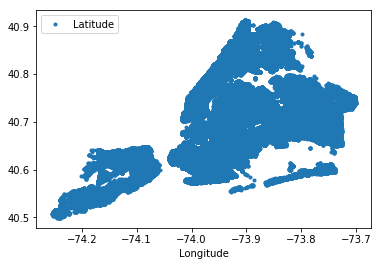

In [177]:
crimeData.plot(x='Longitude', y='Latitude', style='.')

Cool!  The data recreates the shape of Manhattan!  Or, put another way, there has been crime committed in virtually every area of Manhattan.  Expected, but still an interesting thing to think about when you're walking the streets of NYC!

In [218]:
crimeData.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


Ok, now let's start to get a handle on the stop and frisk data.  Here's how the data is structured:

In [219]:
#stopfriskData['xcoord'].astype(float)
xtofloatstopfrisk=list()
ytofloatstopfrisk=list()
baddatastopfrisk=list()
for i in stopfriskData.index:
    try:
        xtofloatstopfrisk.append(float(stopfriskData['xcoord'][i]))
        ytofloatstopfrisk.append(float(stopfriskData['ycoord'][i]))
    except:
        baddatastopfrisk.append(i)

xtofloatcrime=list()
ytofloatcrime=list()
baddatacrime=list()
for i in crimeData.index:
    try:
        xtofloatcrime.append(float(crimeData['X_COORD_CD'][i]))
        ytofloatcrime.append(float(crimeData['Y_COORD_CD'][i]))
    except:
        baddatacrime.append(i)
        
stopfriskData.drop(baddatastopfrisk,inplace=True)
crimeData.drop(baddatacrime,inplace=True)

In [220]:
print(len(stopfriskData['xcoord']))

21747


In [222]:
stopfriskData['xcoordfloat']=pd.Series(xtofloatstopfrisk,index=stopfriskData.index)
stopfriskData['ycoordfloat']=pd.Series(ytofloatstopfrisk,index=stopfriskData.index)

crimeData['xcoordfloat']=pd.Series(xtofloatcrime,index=crimeData.index)
crimeData['ycoordfloat']=pd.Series(ytofloatcrime,index=crimeData.index)

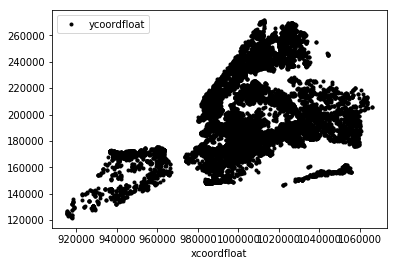

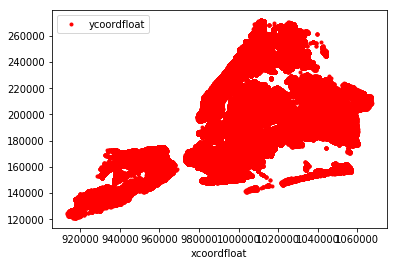

In [224]:
stopfriskData.plot(x='xcoordfloat', y='ycoordfloat', style='.k')
crimeData.plot(x='xcoordfloat', y='ycoordfloat', style='.r')
plt.show()

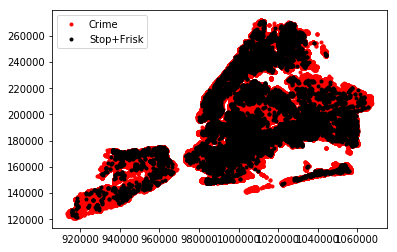

In [230]:
plt.plot(crimeData['xcoordfloat'],crimeData['ycoordfloat'],'.r',label='Crime')
plt.plot(stopfriskData['xcoordfloat'],stopfriskData['ycoordfloat'],'.k',label='Stop+Frisk')
plt.legend()
plt.show()

In [231]:
stopfriskData.sector.unique()

array(['E', 'H', 'M', 'B', 'G', 'K', 'A', 'D', 'C', 'J', 'F', 'I', 'Q',
       'P', 'U', 'R', 'N', ' ', 'T'], dtype=object)

In [195]:
baddata
print(len(xtofloat))
print(len(baddata))

21747
816


Ok, so the first thing to notice if we're going to combine the crime data with the stop and frisk data is that the position coordinates are not not given in latitude/longitude in the stop and frisk data, while it is in the crime stats data.  From here we have two choices: work in the New York plane coordinates system (xcoord, ycoord) or transform the stop and frisk data to get the latitude longitude data...

Here is some people who converted the x,y coordinates to lat/long: https://github.com/mattpiccolella/stop-and-frisk/blob/master/report.md

In [244]:
#onvert from feet to meeters
stopfriskData['xcoordfloat'] = stopfriskData['xcoordfloat'].apply(lambda row: row*0.3048)
stopfriskData['ycoordfloat'] = stopfriskData['ycoordfloat'].apply(lambda row: row*0.3048)

proj=Proj("+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")
#"+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs"
results = stopfriskData.apply(lambda row: proj(float(row['xcoordfloat']), float(row['ycoordfloat']), inverse=True), axis=1)

In [248]:
results

0        (-76.43497210618573, 40.271521500984115)
1        (-76.44312272661283, 40.331088359769375)
2        (-76.44643633018386, 40.328779556581516)
3        (-76.44643633018386, 40.328779556581516)
4        (-76.44643633018386, 40.328779556581516)
5        (-76.44643633018386, 40.328779556581516)
6          (-76.42970737066133, 40.2909686737507)
7        (-76.44642719822453, 40.307856789433785)
8         (-76.45006295724502, 40.30865442846403)
9         (-76.46366198129188, 40.27815909614225)
10        (-76.43705196358789, 40.28443902568408)
11        (-76.41696599736969, 40.29370764663671)
12        (-76.45124640178538, 40.32003172714182)
13        (-76.50308308731567, 40.28136302440836)
14         (-76.4356604188047, 40.33513590221957)
15        (-76.4349568455783, 40.332598181016145)
16        (-76.45237203374565, 40.31926773831454)
17        (-76.42657440500716, 40.32363594382378)
18        (-76.43563318306475, 40.34720612043771)
19       (-76.43700449744809, 40.339435151884956)


In [247]:
from sklearn.cluster import KMeans
KMmodel=KMeans(n_clusters=30, init='k-means++', n_init=10, max_iter=300)
stopfriskCluster=KMmodel.fit(results)
print(stopfriskCluster.cluster_centers_)

ValueError: setting an array element with a sequence.

In [246]:
import folium
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
#marker = folium.CircleMarker(location=[40.738, -73.98])
#marker.add_to(folium_map)
color="#0A8A9F" #teal
for i in results:
    folium.CircleMarker(location=(i[0],
                                  i[1]),
                        radius=1,
                        color=color,
                        fill=True).add_to(folium_map)

KeyboardInterrupt: 

## Let's convert the coordinate data from stopfristData to latitude longitude

In [176]:
from pyproj import Proj

'''
pnyc = Proj(
    proj='lcc',
    datum='NAD83',
    lat_1=40.666667,
    lat_2=41.033333,
    lat_0=40.166667,
    lon_0=-74.0,
    x_0=984250.0,
    y_0=0.0,
    preserve_units=True)

'''

pnyc=Proj("+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")
#lon, lat = pnyc(x, y, inverse=True)
#print(lon)
#print(lat)

In [232]:
pnyc=Proj(init="ESRI:102718", preserve_units=True)

RuntimeError: b'no system list, errno: 2\n'

In [177]:
xstopfrisk=list()
ystopfrisk=list()
counter=0
baddatacounter=0
baddata=list()
for i in stopfriskData.index:
    try:
        x,y=pnyc(float(stopfriskData['xcoord'][i]), float(stopfriskData['ycoord'][i]), inverse=True)
        xstopfrisk.append(x)
        ystopfrisk.append(y)
    except:
        print(stopfriskData['xcoord'][i])
        print(stopfriskData['ycoord'][i])
        print(counter)
        baddatacounter+=1
        baddata.append(counter)

    counter+=1

 
 
66
 
 
69
 
 
87
 
 
148
 
 
267
 
 
269
 
 
302
 
 
336
 
 
352
 
 
357
 
 
404
 
 
417
 
 
427
 
 
428
 
 
441
 
 
464
 
 
512
 
 
616
 
 
682
 
 
712
 
 
787
 
 
790
 
 
826
 
 
829
 
 
830
 
 
847
 
 
920
 
 
941
 
 
942
 
 
943
 
 
961
 
 
964
 
 
1018
 
 
1071
 
 
1077
 
 
1095
 
 
1253
 
 
1254
 
 
1267
 
 
1301
 
 
1303
 
 
1308
 
 
1309
 
 
1310
 
 
1313
 
 
1320
 
 
1408
 
 
1458
 
 
1554
 
 
1586
 
 
1587
 
 
1657
 
 
1671
 
 
1696
 
 
1704
 
 
1759
 
 
1808
 
 
1810
 
 
1837
 
 
1891
 
 
1918
 
 
1922
 
 
1931
 
 
1960
 
 
2025
 
 
2036
 
 
2140
 
 
2142
 
 
2200
 
 
2233
 
 
2335
 
 
2337
 
 
2338
 
 
2357
 
 
2358
 
 
2363
 
 
2372
 
 
2381
 
 
2480
 
 
2482
 
 
2483
 
 
2484
 
 
2498
 
 
2532
 
 
2538
 
 
2580
 
 
2593
 
 
2597
 
 
2659
 
 
2673
 
 
2674
 
 
2709
 
 
2810
 
 
2883
 
 
2898
 
 
2988
 
 
2989
 
 
2990
 
 
2993
 
 
3096
 
 
3097
 
 
3098
 
 
3099
 
 
3125
 
 
3182
 
 
3199
 
 
3220
 
 
3243
 
 
3267
 
 
3290
 
 
3297
 
 
3337
 
 
3338
 
 
3376
 
 
3377


In [178]:
stopfriskData.drop(stopfriskData.index[baddata],inplace=True)
stopfriskData['Longitude']=pd.Series(xstopfrisk,index=stopfriskData.index)
stopfriskData['Latitude']=pd.Series(ystopfrisk,index=stopfriskData.index)

In [179]:
stopfriskData.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM,Longitude,Latitude
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,E,7,,1000091,156314,CM,1,14,-65.631877,41.272915
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,E,14,,994617,227693,CM,1,20,-65.615493,41.917306
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,H,,16,991510,225019,CM,1,78,-65.655835,41.896011
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,H,,16,991510,225019,CM,1,78,-65.655835,41.896011
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,H,,16,991510,225019,CM,1,78,-65.655835,41.896011


In [180]:
crimeData.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


# Clustering crime and stop and frisk data

In [181]:
from sklearn.cluster import KMeans
KMmodel=KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300)
stopfriskCluster=KMmodel.fit(stopfriskData[['Longitude','Latitude']])
print(stopfriskCluster.cluster_centers_)

[[-65.74624019  41.36742497]
 [-65.27079444  42.10837553]
 [-65.23620682  41.55455072]
 [-65.69618483  41.72171924]
 [-66.23988589  41.36752495]
 [-65.54843689  41.51309101]
 [-65.48493805  41.95878699]
 [-64.99255975  41.55443219]]


In [153]:
folium_map

In [109]:
stopfriskData.shape

(22563, 112)

In [88]:
crimeData.drop(['Lat_Lon','X_COORD_CD','Y_COORD_CD'],axis=1,inplace=True)
crimeData=crimeData[crimeData['BORO_NM']=='MANHATTAN']
#crimeData.keys()

In [90]:
crimeData.head()
crimeData.dropna(subset=['OFNS_DESC'],axis=0,inplace=True) 

In [99]:
murderData=crimeData[crimeData['OFNS_DESC'].str.contains("MURDER")][['Latitude','Longitude']]
homicideData=crimeData[crimeData['OFNS_DESC'].str.contains("HOMICIDE")]
assaultData=crimeData[crimeData['OFNS_DESC'].str.contains("ASSAULT")]
assaultData.dropna(subset=['Latitude'],axis=0,inplace=True)
assaultData.dropna(subset=['Longitude'],axis=0,inplace=True)
assaultData.head()

/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,Latitude,Longitude
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,40.738002,-73.987891
34,590638275,12/31/2015,22:30:00,NaN,NaN,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,FELONY,N.Y. POLICE DEPT,MANHATTAN,13.0,NaN,PARK/PLAYGROUND,MADISON SQUARE PARK,NaN,40.742781,-73.986598
49,372582288,12/31/2015,22:00:00,12/31/2015,22:19:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. HOUSING POLICE,MANHATTAN,7.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,LA GUARDIA,40.711565,-73.988343
54,834212518,12/31/2015,22:00:00,12/31/2015,22:19:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. HOUSING POLICE,MANHATTAN,7.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,LA GUARDIA,40.711565,-73.988343
63,124480034,12/31/2015,21:45:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,STREET,NaN,NaN,40.736691,-73.995231


In [92]:
murderData.head()

,Latitude,Longitude
3583,40.810877,-73.941064
57962,40.867233,-73.920916
66374,40.752863,-73.992981
82048,40.800385,-73.954701
92513,40.796749,-73.929194


# Stuff that is not working below

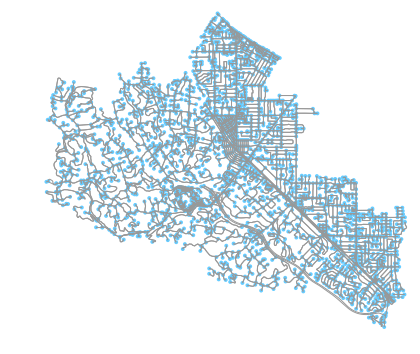

(<matplotlib.figure.Figure at 0x7f1aeab58978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1aeab50630>)

In [21]:
import matplotlib.pyplot as plt
import osmnx as ox
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

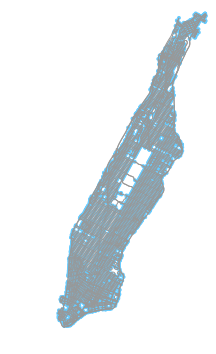

(<matplotlib.figure.Figure at 0x7f1aeb709d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1aeb709668>)

In [15]:
import osmnx as ox
G = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive')
ox.plot_graph(ox.project_graph(G))

In [16]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [17]:
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


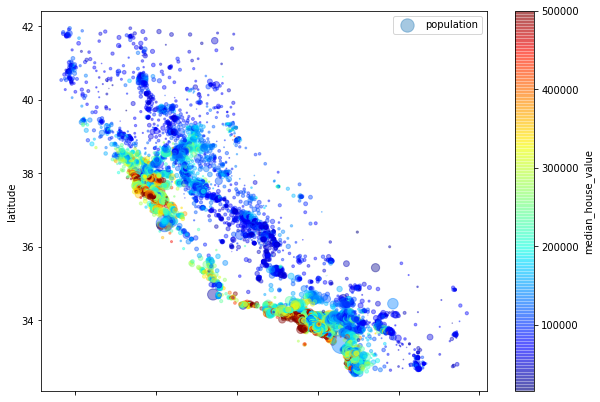

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [19]:
import geopandas as gpd

# File path
points_fp = r"/home/ben/Dropbox/Insight/Elucd/shapefiles/manhattan/MNMapPLUTO.shp"

# Read the data
points = gpd.read_file(points_fp)

In [20]:
points.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1545,52,108,138,4000,02,5,10028,E022,...,0.000000e+00,None,1,None,None,17V1.1,0,260.428942,2867.154706,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,MN,723,7501,104,93,6000,02,3,10001,E003,...,1.007230e+09,11/30/2006,1,None,None,17V1.1,7,417.764545,10907.639931,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,MN,1680,48,111,170,5000,04,8,10029,E091,...,0.000000e+00,None,1,1,1,17V1.1,0,256.893308,2665.033424,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,MN,1385,32,108,130,2003,02,4,10021,E039,...,0.000000e+00,None,1,None,None,17V1.1,0,505.033271,15302.920916,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,MN,1197,27,107,169,5000,03,6,10024,E074,...,0.000000e+00,None,1,None,None,17V1.1,0,295.652483,4374.612455,"POLYGON ((992273.6850000024 224863.4904000014,..."
